# Setup

## Imports

In [1]:
import os.path

from random import shuffle
from skimage.transform import resize

vai Modules

In [2]:
from vaiutils import path_consts, randpick, plot_images

Keras Modules

In [3]:
import keras.backend as K

from keras.models import load_model

Using TensorFlow backend.
/home/vaisakh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Define Useful Variables and Functions

In [4]:
for k, v in path_consts(['COCO', 'SampleImages']):
    exec(k + ' = v')

Custom Modules

In [5]:
from colorizer import lab_to_rgb, rgb_to_lab

## Checks

In [6]:
assert os.path.exists(os.path.join(DIR_CHECKPOINTS, 'ab_bins.npy')), "Gamut Bins don't exist. Run GamutBins notebook"

## Load Data

In [7]:
data = os.path.join(DIR_DATA['COCO'], 'val2017', '*.jpg')

In [8]:
data_test = os.path.join(DIR_DATA['SampleImages'], 'images', '*.jpg')

In [9]:
ab_bins = np.load(os.path.join(DIR_CHECKPOINTS, 'ab_bins.npy'))
Q = len(ab_bins)

## Load Model

In [10]:
K.set_learning_phase(False)

In [11]:
model = load_model(os.path.join(DIR_CHECKPOINTS, 'model.h5'))

/home/vaisakh/anaconda3/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Define Sampling Function

In [12]:
bins = K.constant(ab_bins)

In [13]:
img = K.placeholder((None, None, None, 3))
img_l = rgb_to_lab(img)[:, :, :, :1]
T = K.placeholder([])
img_ab_probs = K.softmax(model(img_l - 50))
img_ab =  K.dot(K.softmax(K.log(img_ab_probs) / T), bins)
img_lab = K.concatenate([img_l, img_ab])
img_color = lab_to_rgb(img_lab)
colorizer = K.function([img, T], [img_l, img_color])

In [14]:
def colorize(train=True, T=0.38, show_original=False):
    d = data if train else data_test
    img = imread(randpick(d))
    img_shape = np.ceil(np.array(img.shape[:-1]) / 8).astype(int) * 8
    img = np.expand_dims(resize(img, img_shape, mode='constant'), 0)
    
    img_l, img_color = colorizer([img, T])
    if show_original:
        img_list = [img[0] * 255, img_color[0] * 255]
        shuffle(img_list)
    else:
        img_list = [np.repeat(img_l[0], 3, -1) * 2.55, img_color[0] * 255]
        
    plot_images(img_list, savepath=os.path.join(DIR_OUTPUT, 'color.jpg'))

# Colorize

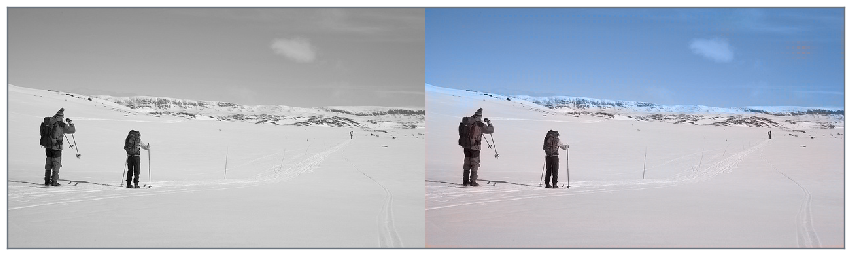

In [44]:
colorize()

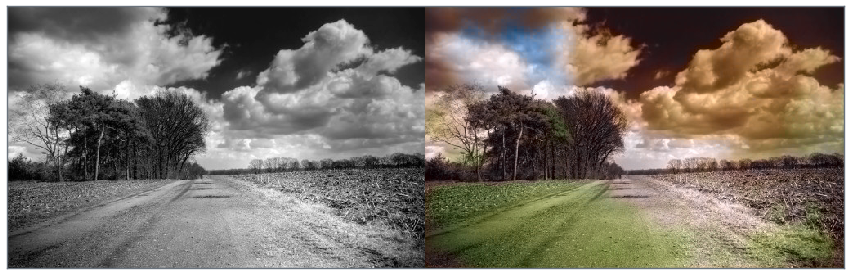

In [18]:
colorize(train=False)